# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://pef.fa.us1.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX/job/4998">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.
- Located in Israel

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to one of the following:
    - roni.goldshmidt@ni.com / miriam.horovicz@ni.com 
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [112]:
import pandas as pd
import numpy as np
import zipfile

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Load Data

In [113]:
#load zip file
zf = zipfile.ZipFile('data.zip') 

In [114]:
#load train data
df_wafers = pd.read_csv(zf.open('df_wafers.csv'))
df_wafers.head()

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
0,3b2e28,0,12,False,False
1,3b2e28,0,13,True,False
2,3b2e28,0,14,False,False
3,3b2e28,0,15,True,False
4,3b2e28,0,16,True,False


In [115]:
#load test data
df_wafers_test = pd.read_csv(zf.open('df_wafers_test.csv'))
df_wafers_test.head()

,WaferName,DieX,DieY,IsGoodDie
0,5a6ad6,0,12,False
1,5a6ad6,0,13,True
2,5a6ad6,0,14,True
3,5a6ad6,0,15,True
4,5a6ad6,0,16,True


You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

In [116]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

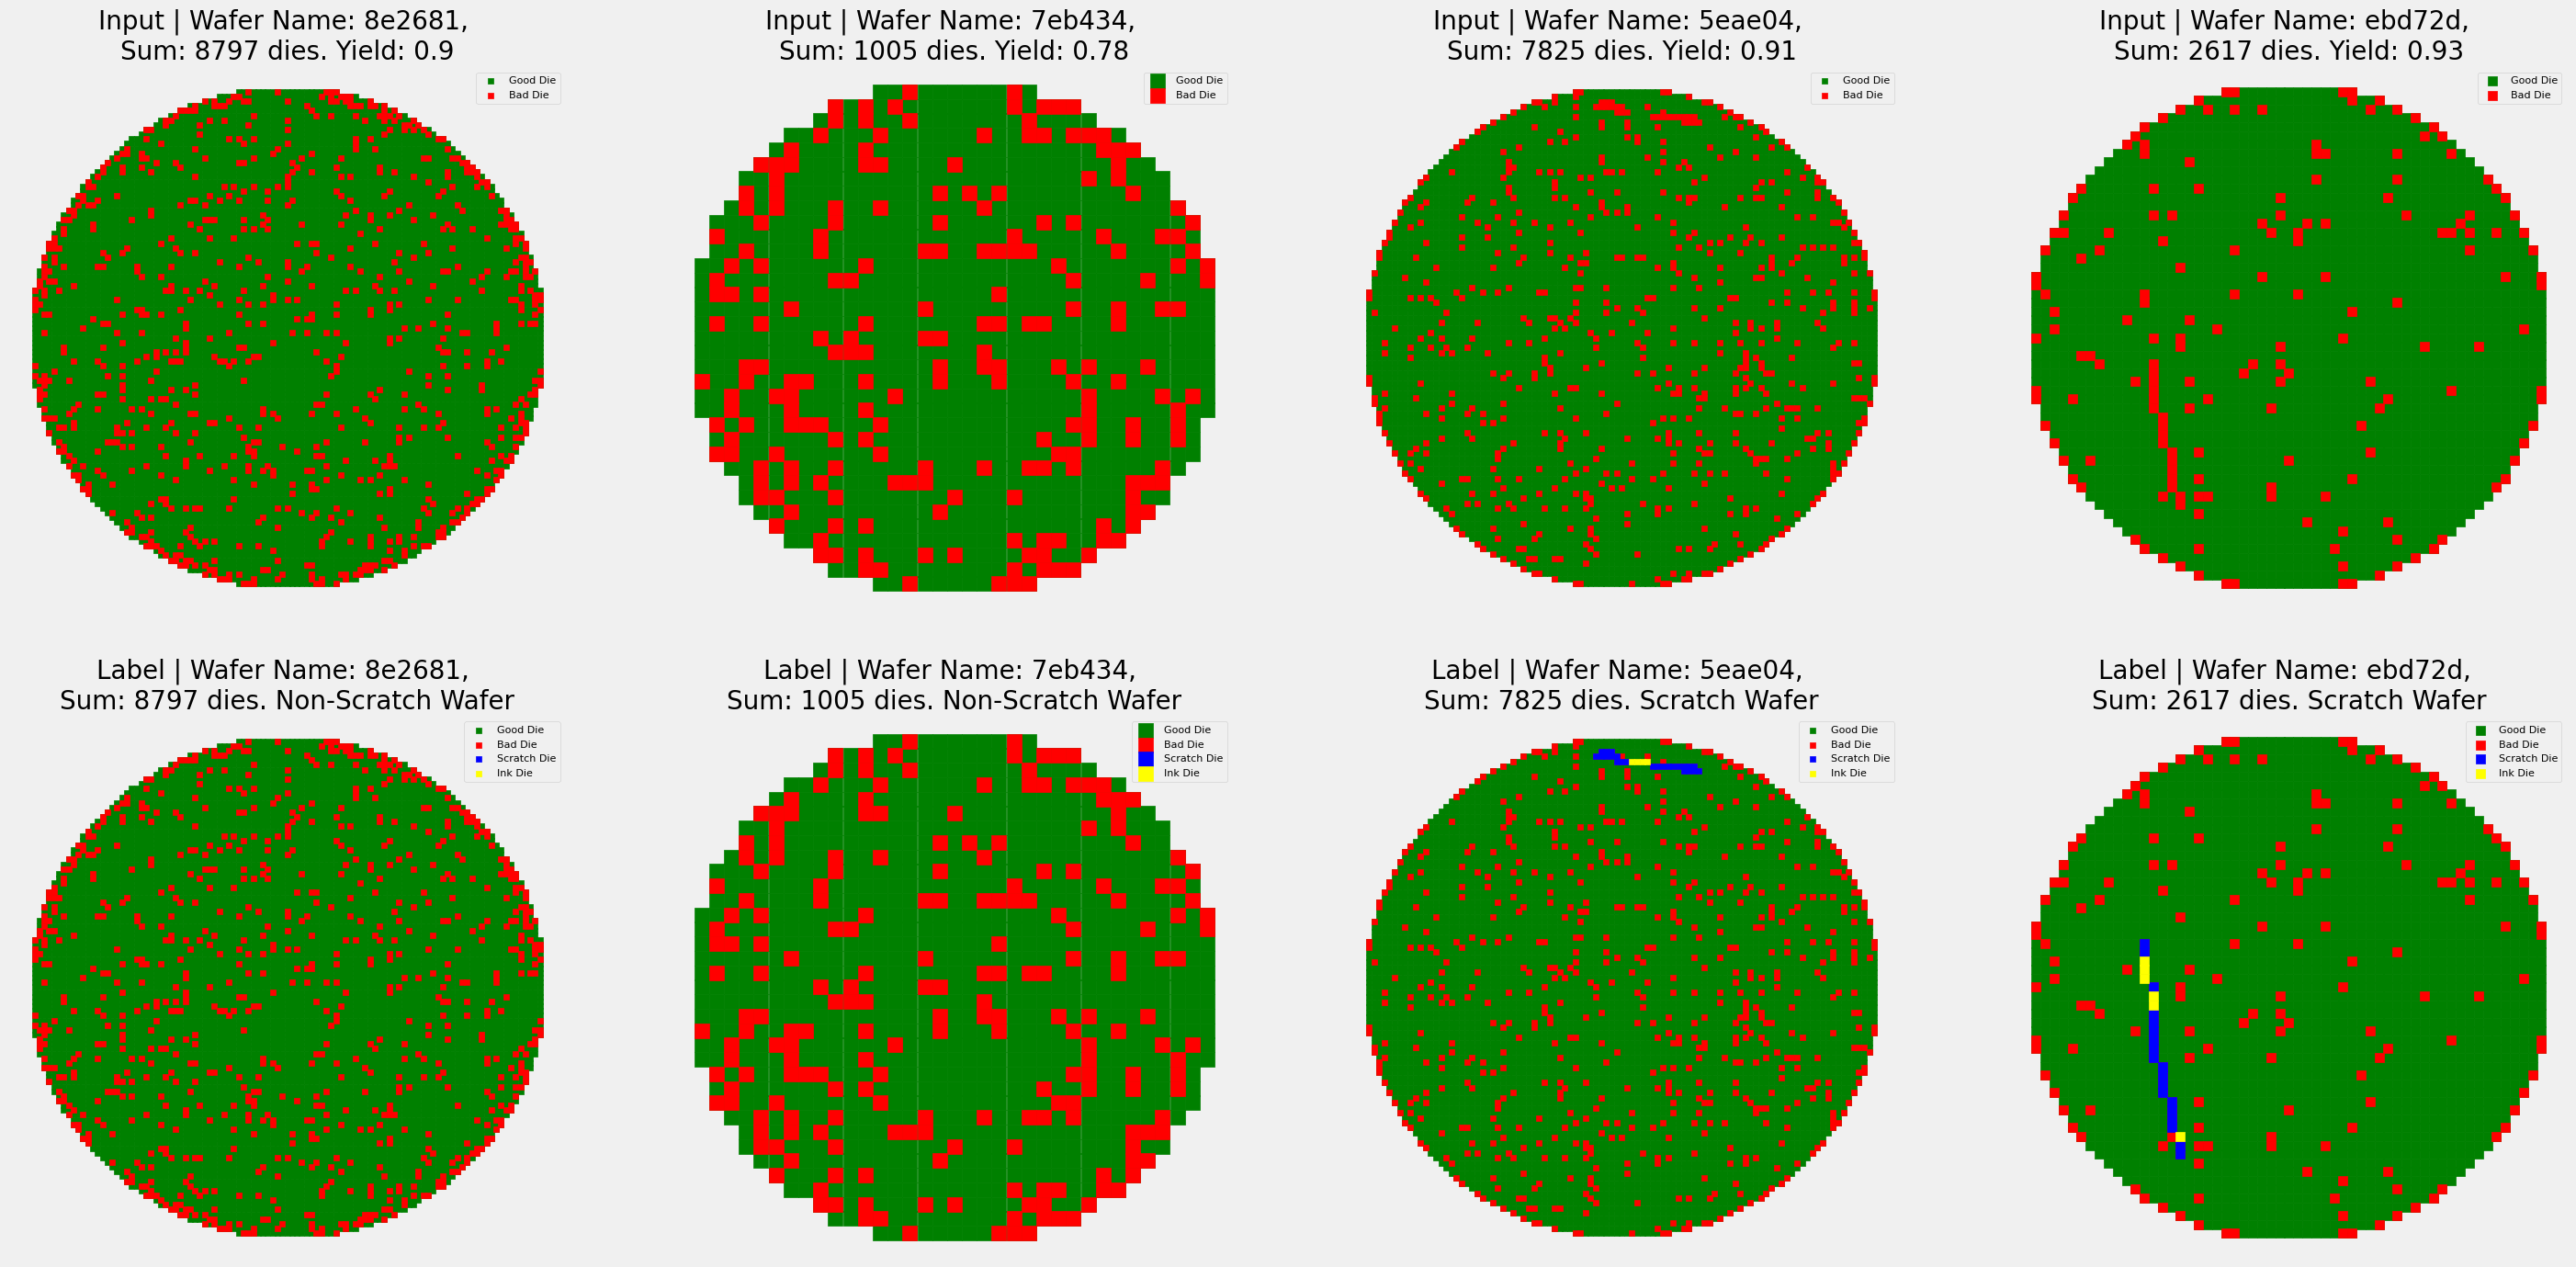

In [117]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

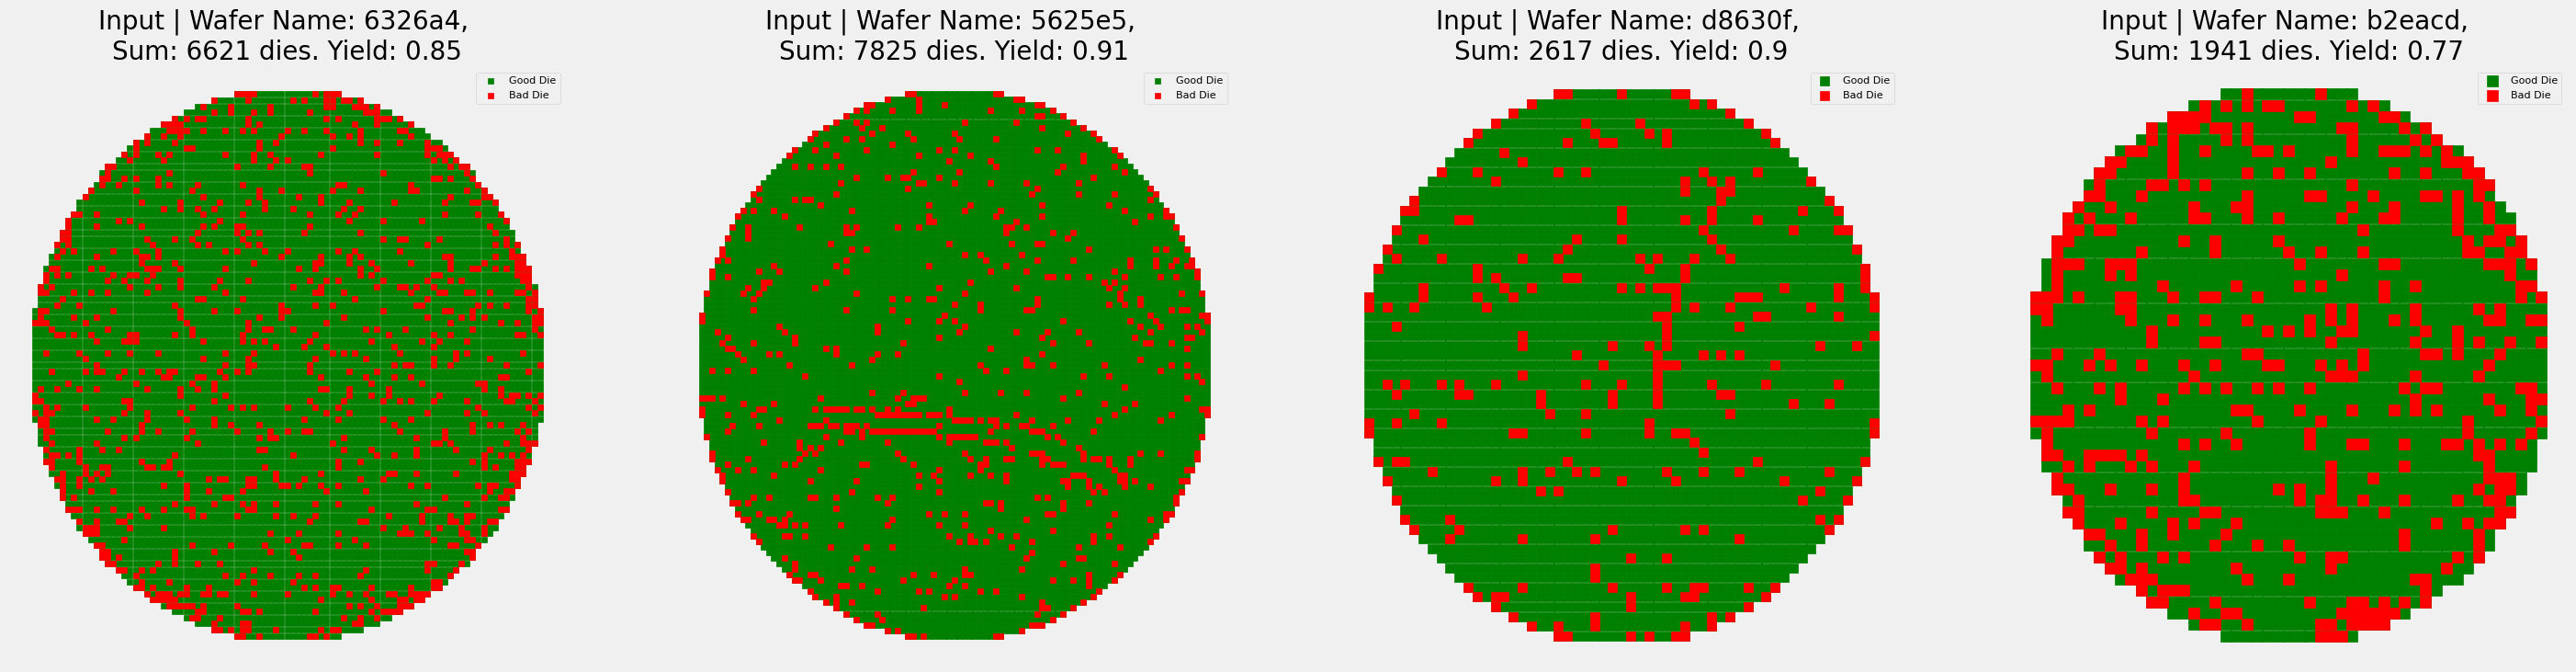

In [118]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

# Build your solution

In [119]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler
import math


class WafersDataSet(Dataset):
    def __init__(self, data_frame: pd.DataFrame, is_train=False):
        self.is_train = is_train

        data_frame = data_frame.reset_index(drop=True)
        data_frame['IsGoodDie'] = data_frame['IsGoodDie'].astype(np.float32)

        # Calculating the positive weight for class of scratched die (1), it will be a parameter to the loss function
        if is_train:
            binary_count = torch.bincount(torch.tensor(data_frame['IsScratchDie'].astype(int)))
            binary_percentage = (binary_count / binary_count.sum()).numpy()
            self.positive_weight = torch.tensor(binary_percentage[0] / binary_percentage[1])

        # Group by wafers names to get each wafer
        groupy = data_frame.groupby(data_frame['WaferName'], sort=False)
        self.wafers = [groupy.get_group(x).drop('WaferName', axis=1) for x in groupy.groups]

        # If it is train data, get the labels and remove them from the wafers
        if is_train:
            self.labels = [train_wafer['IsScratchDie'].astype(np.float32) for train_wafer in self.wafers]
            self.wafers = [train_wafer.drop('IsScratchDie', axis=1) for train_wafer in self.wafers]

        # Scale the X and Y positions for each wafer
        scaler = StandardScaler()
        for i in range(len(self.wafers)):
            self.wafers[i][['DieX', 'DieY']] = scaler.fit_transform(self.wafers[i][['DieX', 'DieY']])

    # Number of wafers in data set
    def __len__(self):
        return len(self.wafers)

    def __getitem__(self, index):
        wafer = torch.tensor(self.wafers[index].values)

        if self.is_train:
            label = self.labels[index]
            label = torch.tensor(np.array(label), dtype=torch.float32)
            return wafer.float(), torch.unsqueeze(label, 1).float()
        else:
            return wafer.float()


class RegressionNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate, pos_weight):
        super(RegressionNN, self).__init__()
        self.learning_rate = learning_rate

        # Initalizing the weights of layers as xavier distribution
        self.linear1 = torch.nn.Linear(input_dim, hidden_dim)
        self.linear1.weight.data.normal_(0, 0.01)
        self.linear1.bias.data.fill_(0)

        self.linear2 = torch.nn.Linear(hidden_dim, output_dim)
        self.linear2.weight.data.normal_(0, 0.01)
        self.linear2.bias.data.fill_(0)

        self.sigmoid = torch.nn.Sigmoid()

        # Since it is binary classification, I'll use BCE with sigmoid inside of it 
        self.criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    def forward(self, x):
        output = self.linear1(x)
        output = self.sigmoid(output)
        output = self.linear2(output)
        return output

    def loss(self, predictions, labels):
        return self.criterion(predictions, labels)

    def predict(self, test_df):
        test_dataset = WafersDataSet(test_df)
        test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=4)

        predictions = []
        self.eval()
        with torch.no_grad():
            for inputs in test_loader:
                if is_low_yield(inputs):  # Do not test on low yield wafers, predict that they are all unscratched (0)
                    predictions.extend([0] * inputs.shape[1])
                    continue

                inputs = inputs.to(device)

                outputs = model.forward(inputs)

                outputs = model.sigmoid(outputs)
                predicted = torch.round(outputs).squeeze()
                predictions.extend(list(predicted.numpy()))

        return predictions

In [120]:
def is_low_yield(wafer) -> bool:
    good_die_column = wafer.squeeze().numpy()[:, -1]
    answer = round(good_die_column.sum() / good_die_column.shape[0], 2)
    return answer < 0.85


def view_train(num_epochs, train_losses, validation_losses, train_acc, validation_acc):
    # Plot the loss and accuracy graphs for train and validation
    plt.style.use('fivethirtyeight')
    plt.plot(list(range(num_epochs)), train_losses)
    plt.plot(list(range(num_epochs)), validation_losses)
    plt.show()

    plt.plot(list(range(num_epochs)), train_acc)
    plt.plot(list(range(num_epochs)), validation_acc)
    plt.show()


def validate(model, validationLoader, device, validation_loss, num_correct, total):
    model.eval()
    with torch.no_grad():
        for inputs, labels in validationLoader:
            if is_low_yield(inputs):
                continue

            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model.forward(inputs)

            current_loss = model.loss(outputs, labels)
            validation_loss += current_loss.item()

            outputs = model.sigmoid(outputs)
            predicted = torch.round(outputs).squeeze()

            num_correct += (predicted == labels.squeeze()).sum().item()
            total += labels.shape[1]

    return validation_loss, num_correct, total


def train(model, trainLoader, num_epochs, validationLoader=None, device="cpu"):
    optimizer = torch.optim.SGD(model.parameters(), lr=model.learning_rate)

    best_val_loss = float('inf')

    train_losses = []
    validation_losses = []
    train_acc = []
    validation_acc = []
    for epoch in range(num_epochs):
        num_correct = 0
        total = 0
        train_loss = 0.0

        model.train()
        for inputs, labels in trainLoader:
            if is_low_yield(inputs):
                continue

            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model.forward(inputs)

            current_loss = model.loss(outputs, labels)
            train_loss += current_loss.item()

            current_loss.backward()
            optimizer.step()

            outputs = model.sigmoid(outputs)
            predicted = torch.round(outputs).squeeze()

            num_correct += (predicted == labels.squeeze()).sum().item()
            total += labels.shape[1]

        train_accuracy = num_correct / total
        epoch_train_loss = train_loss / len(trainLoader)
        train_losses.append(epoch_train_loss)
        train_acc.append(train_accuracy)

        validation_loss, num_correct, total = validate(model, validationLoader, device, 0.0, 0, 0)

        validation_accuracy = num_correct / total
        epoch_validation_loss = validation_loss / len(validationLoader)
        validation_losses.append(epoch_validation_loss)
        validation_acc.append(validation_accuracy)

        print(f"\n\t[{epoch + 1}/{num_epochs}] Train Loss:     {epoch_train_loss}"
              f"\n\t[{epoch + 1}/{num_epochs}] Train Accuracy: {train_accuracy}"
              f"\n\t[{epoch + 1}/{num_epochs}] Valid Loss:     {epoch_validation_loss}"
              f"\n\t[{epoch + 1}/{num_epochs}] Valid Accuracy: {validation_accuracy}\n")

        if epoch_validation_loss < best_val_loss:
            best_val_loss = epoch_validation_loss
            torch.save(model.state_dict(), 'best_model.pt')

    view_train(num_epochs, train_losses, validation_losses, train_acc, validation_acc)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



	[1/12] Train Loss:     1.3170861411953763
	[1/12] Train Accuracy: 0.00878664257386579
	[1/12] Valid Loss:     1.2872270644471353
	[1/12] Valid Accuracy: 0.00586670859650279


	[2/12] Train Loss:     1.0665977812201088
	[2/12] Train Accuracy: 0.463852848347205
	[2/12] Valid Loss:     0.9050407342764796
	[2/12] Valid Accuracy: 0.9153044287233252


	[3/12] Train Loss:     0.8386998273033116
	[3/12] Train Accuracy: 0.9156639711743955
	[3/12] Valid Loss:     0.8415838802347377
	[3/12] Valid Accuracy: 0.9153044287233252


	[4/12] Train Loss:     0.8170093163011634
	[4/12] Train Accuracy: 0.9156639711743955
	[4/12] Valid Loss:     0.8376365816030575
	[4/12] Valid Accuracy: 0.9153044287233252


	[5/12] Train Loss:     0.815685642930698
	[5/12] Train Accuracy: 0.9156639711743955
	[5/12] Valid Loss:     0.8400165033811817
	[5/12] Valid Accuracy: 0.9153044287233252


	[6/12] Train Loss:     0.8156850012589474
	[6/12] Train Accuracy: 0.9156639711743955
	[6/12] Valid Loss:     0.8362882382483506


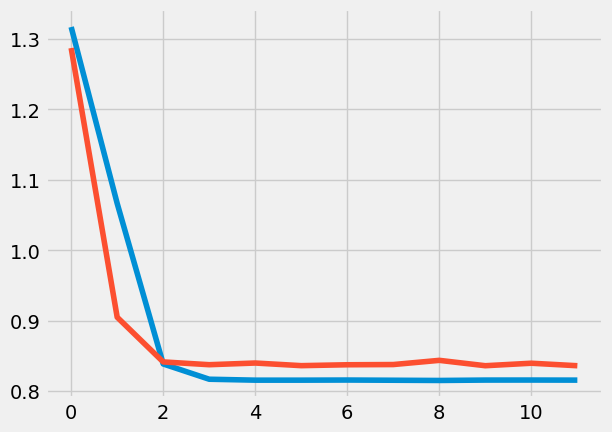

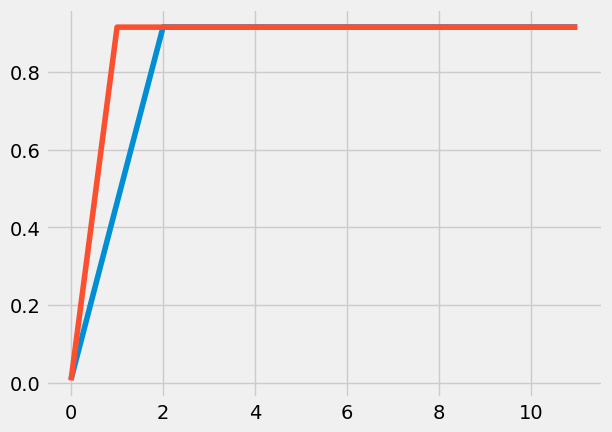

In [121]:
input_size = 3
hidden_size = 2
output_size = 1  # Binary classification
batch_size = 1
shuffle = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
learning_rate = 0.01

train_dataset = WafersDataSet(df_wafers, is_train=True)

length = len(train_dataset)
train_percent = 0.8
validation_percent = 0.2
train_subset, validation_subset = random_split(train_dataset, [math.floor(length * train_percent), math.floor(length * validation_percent)],
                                                generator=torch.Generator().manual_seed(1))

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=shuffle,
                          num_workers=4) 

validation_loader = DataLoader(validation_subset, batch_size=batch_size, shuffle=shuffle,
                                num_workers=4)

model = RegressionNN(input_size, hidden_size, output_size, learning_rate, train_dataset.positive_weight)
model.to(device)

num_epochs = 12
train(model, train_loader, num_epochs, validation_loader, device)

# Additional thoughts

Here you can detail about anything you want to mention as additional considerations for this solution, anything from ideas, thoughts, considerations about deployment or anything you may have raised when working on this task in a team.

In [122]:
# How can I filter the low yield wafers? lower than 0.85 is low yield wafer

# Which learning rate is the best for this? 0.01

# Which optimizer is the best for this? maybe SGD, maybe Adam

# I should scale each wafer, not all at once (mean and std per wafer) since they are different sizes. But except the good die column values since they are ones OR zeros only

# Should I implement xavier normal dist for the weight and biases of linear layers? 

# I have to put sigmoid at the end for classification, but because I use BCE loss with sigmoid inside it, I'll put sigmoid right after using the loss function.

# Lets add validation data loader right after train loader with 4 workers

# I need to check the dimensions to see if I need to unsqueeze or squeeze

# Maybe 2 linear layers are too much? overfitting?

# is the accuracy so high because it most of the time predicts zeros which means unscratched dies since they are always the bigger class than scratched (probably the most common case)? YES

# The model is overfitting since the data is imbalanced, I need to manually calculate the weight for each class or also to Oversample the low occurences class (scratched die)

# I should have added WeightedRandomSampler to the train data loader to Oversample the scratch targets

# After adjusting the positive class weights, the model predicts that every bad die is scratched die. It is because of overfitting on the train data set. I think that Oversample can solve this but there is not enough time for this modification

# CONCLUSION:
#  The model is overfitting and I should have used Oversampling. Maybe it would make it better in predicting 

# Submission

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


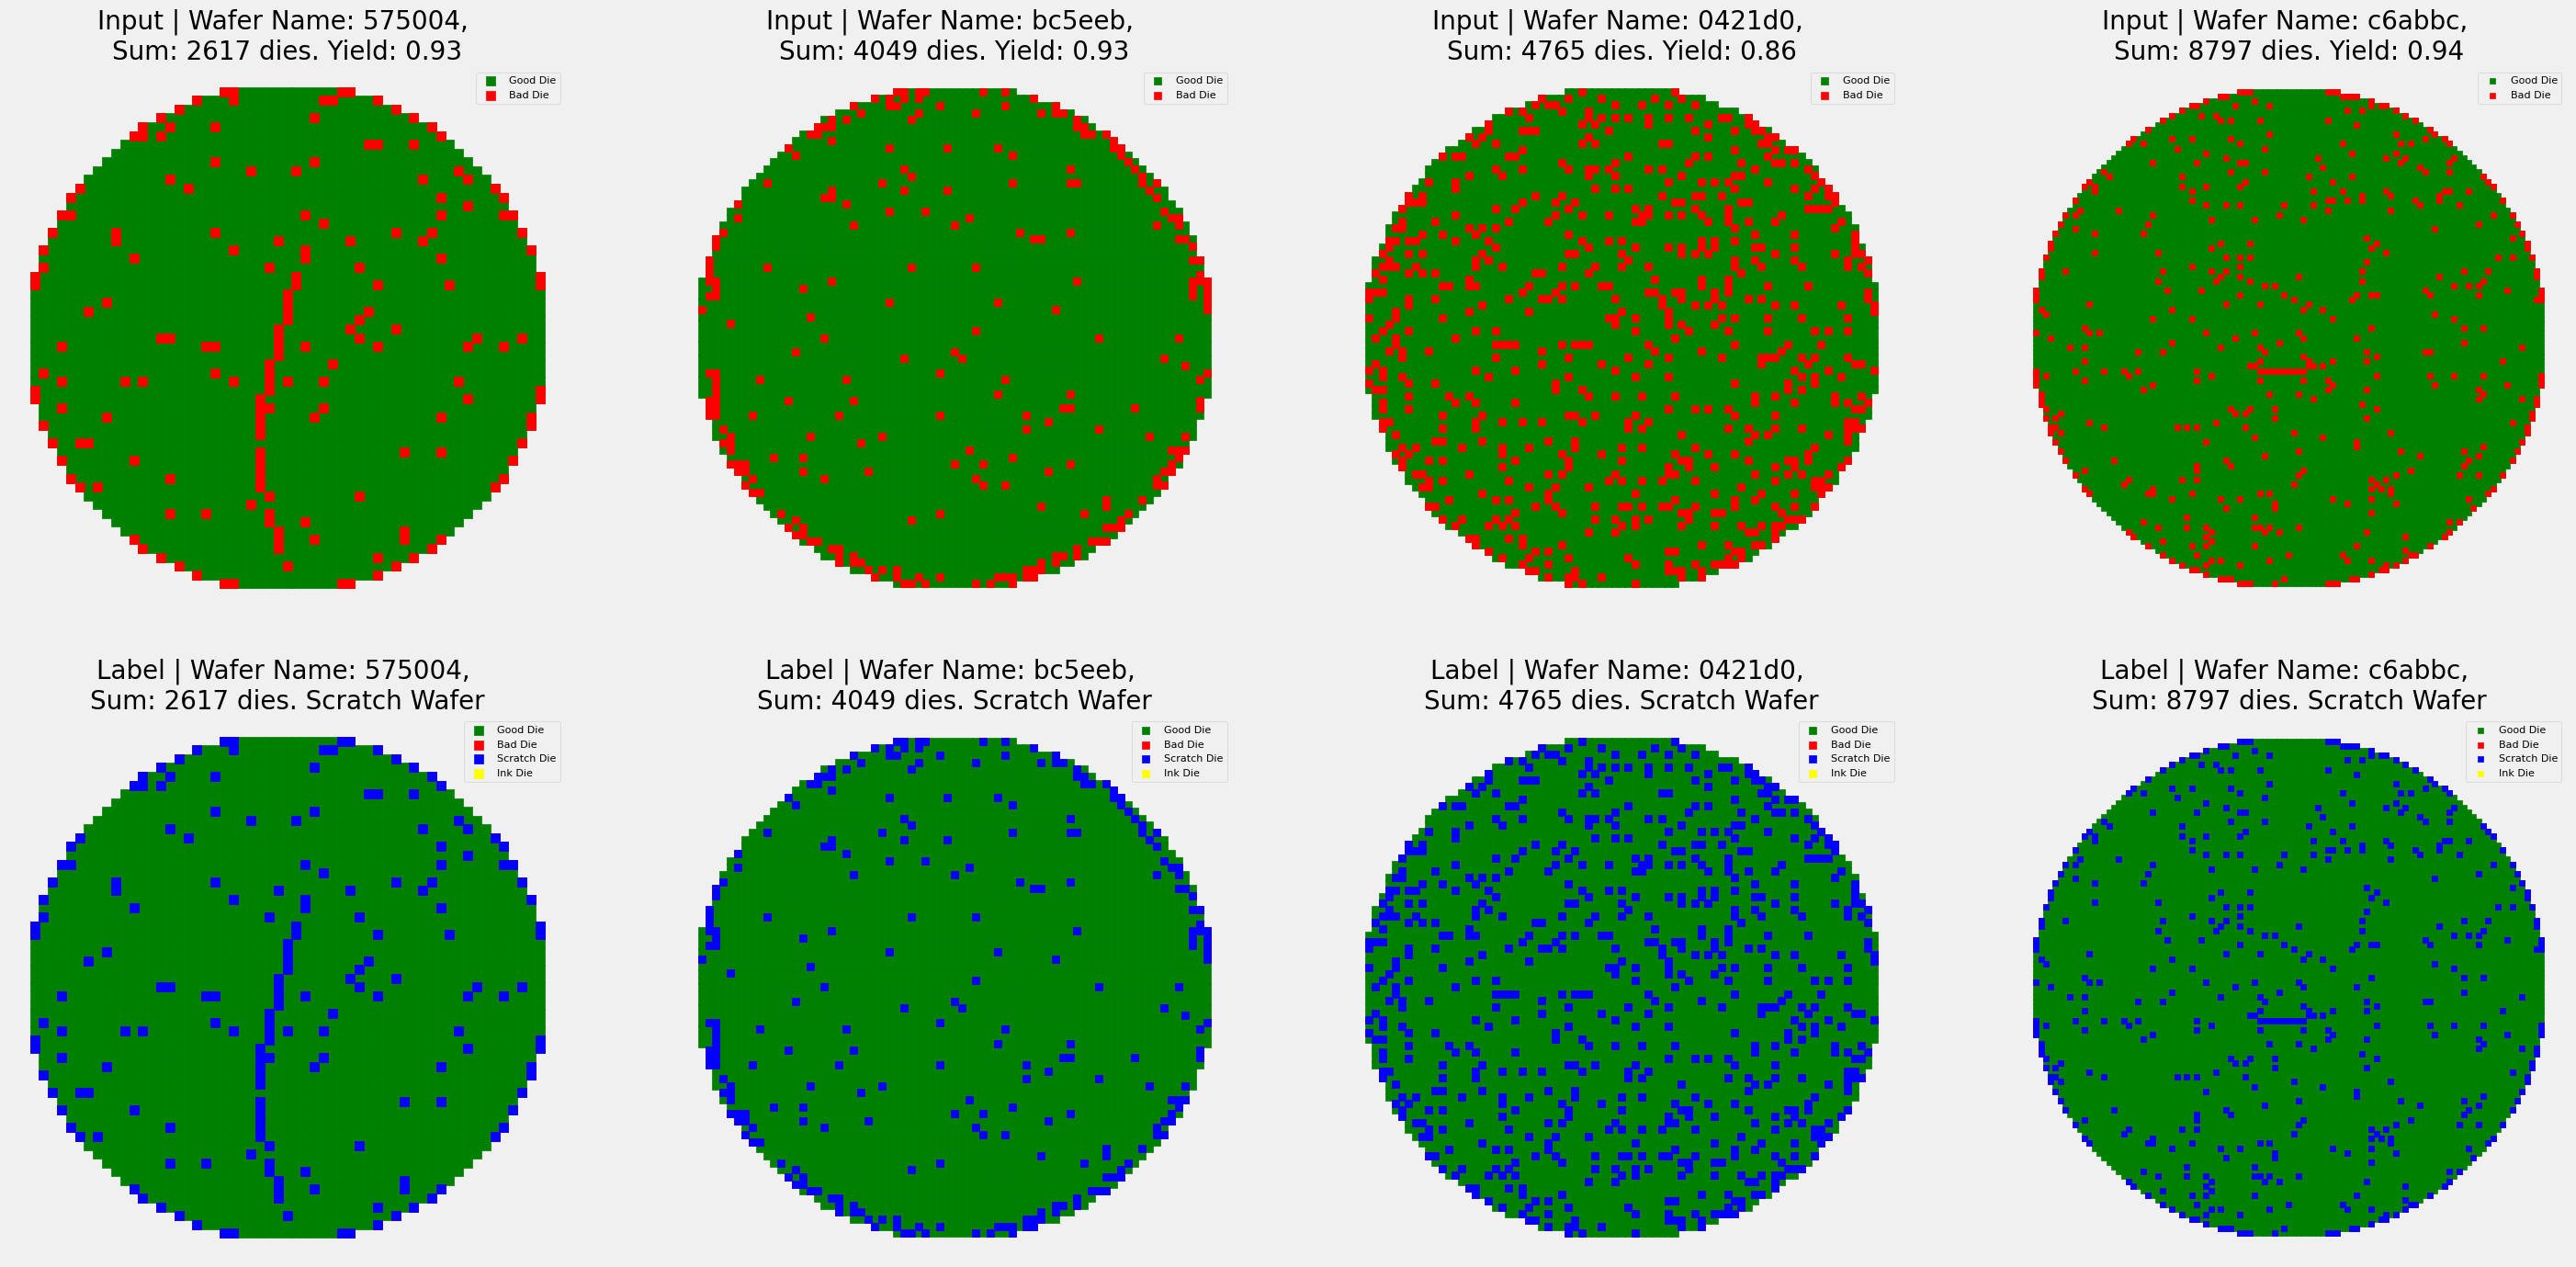

In [123]:
IsScratchDie = model.predict(df_wafers_test)
df_wafers_test['IsScratchDie'] = IsScratchDie
df_wafers_test.to_csv('df_wafers_test_with_preds.csv')

list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = True)